In [24]:
import numpy
import scipy.stats
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [25]:
mpl.style.use("ggplot")

In [26]:
def plot_histogram(data, distribution, modes):
    plt.figure(figsize=(8, 4))
    plt.hist(data, density=True, ec="white")
    plt.title("HISTOGRAM")
    plt.xlabel("Values")
    plt.ylabel("Frequencies")

    x_plot = numpy.linspace(min(data), max(data), 1000)
    y_plot = distribution.pdf(x_plot)
    plt.plot(x_plot, y_plot, linewidth=4, label="PDF KDE")

    for name, mode in modes.items():
        plt.axvline(mode, linewidth=2, label=name + ": " + str(mode)[:7], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))

    plt.legend(title="DISTRIBUTIONS", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


In [27]:
## SCIPY MODE
def calc_scipy_mode(data):
    return scipy.stats.mode(data, keepdims=True)[0][0]


In [28]:
## METHOD 1: MAXIMIZE PDF SCIPY MINIMIZE
def calc_minimize_mode(data, distribution):
    def objective(x):
        return 1 / distribution.pdf(x)[0]
    bnds = [(min(data), max(data))]
    solution = scipy.optimize.minimize(objective, [1], bounds=bnds)
    return solution.x[0]


In [29]:
## METHOD 2: MAXIMIZE PDF AND GET PREIMAGE
def calc_max_pdf_mode(data, distribution):
    x_domain = numpy.linspace(min(data), max(data), 1000)
    y_pdf = distribution.pdf(x_domain)
    i = numpy.argmax(y_pdf)
    return x_domain[i]


In [30]:
## METHOD 3: ## METHOD 3: MAXIMIZE PDF SCIPY SHGO
def calc_shgo_mode(data, distribution):
    def objective(x):
        return 1 / distribution.pdf(x)[0]
    bnds = [[min(data), max(data)]]
    solution = scipy.optimize.shgo(objective, bounds=bnds, n=100 * len(data))
    return solution.x[0]


In [31]:
def calculate_mode(data):
    ## KDE
    distribution = scipy.stats.gaussian_kde(data)

    scipy_mode = calc_scipy_mode(data)
    minimize_mode = calc_minimize_mode(data, distribution)
    max_pdf_mode = calc_max_pdf_mode(data, distribution)
    shgo_mode = calc_shgo_mode(data, distribution)

    modes = {"scipy_mode": scipy_mode, "minimize_mode": minimize_mode, "max_pdf_mode": max_pdf_mode, "shgo_mode": shgo_mode}
    plot_histogram(data, distribution, modes)

    return shgo_mode


In [32]:
def getData(direction):
    sample_distribution_file = open(direction, "r")
    data = [float(x.replace(",", ".")) for x in sample_distribution_file.read().splitlines()]
    return data


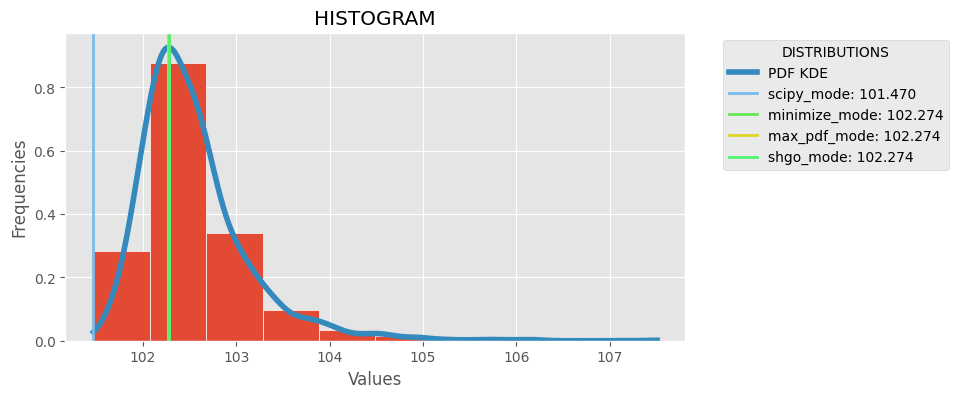

102.27476707297741

In [33]:
## Get Data
path = "../continuous/data/data_dagum_4P.txt"
data = getData(path)
calculate_mode(data)

In [34]:
calc_scipy_mode(data)

101.4709633